<a href="https://colab.research.google.com/github/ctarrington/data-science-hw/blob/master/dbda/ch09-heirarchical-models/heirarchical_on_mint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install arviz==0.6.1
!pip install pymc3==3.8
!pip install Theano==1.0.4

import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import pymc3 as pm
import arviz as az
from runpy import run_path

az.style.use('arviz-darkgrid')
%matplotlib inline

     |████████████████████████████████| 1.4MB 2.7MB/s 
     |████████████████████████████████| 4.1MB 18.9MB/s 
     |████████████████████████████████| 286kB 31.0MB/s 
     |████████████████████████████████| 911kB 2.7MB/s 
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7


In [2]:
!rm -rf data-science-hw
!git clone https://github.com/ctarrington/data-science-hw.git

base_path = './data-science-hw/dbda/ch08-basic-models/'
Coin = run_path(base_path+'/mint.py').get('Coin')
Mint = run_path(base_path+'/mint.py').get('Mint')

Cloning into 'data-science-hw'...
remote: Enumerating objects: 150, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 150 (delta 71), reused 16 (delta 3), pack-reused 0
Receiving objects: 100% (150/150), 2.49 MiB | 12.45 MiB/s, done.
Resolving deltas: 100% (71/71), done.


In [3]:
coins_per_mint = 5
mint = Mint(0.3, 0.025)
coins = mint.make_coins(coins_per_mint)

mint = Mint(0.7, 0.025)
mint.make_coins(coins_per_mint, coins)

In [4]:
flips = []
for ctr in range(50):
  for coin in coins:
    coin.flip(flips)

In [5]:
df = pd.DataFrame(flips, columns=['mint_id', 'coin_id', 'flip'])
df.head()

,mint_id,coin_id,flip
0,0,0,0
1,0,1,0
2,0,2,0
3,0,3,0
4,0,4,0


In [6]:
coin_id = df['coin_id']
mint_id = df['mint_id']

num_coins = len(np.unique(coin_id))
num_mints = len(np.unique(mint_id))

print('num_coins', num_coins)
print('num_mints', num_mints)

num_coins 10
num_mints 2


## No Heirarchy - Coins

/usr/local/lib/python3.6/dist-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/usr/local/lib/python3.6/dist-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Sequential sampling (2 chains in 1 job)
NUTS: [θ]
Sampling chain 0, 0 divergences:   0%|          | 0/2500 [00:00<?, ?it/s]/usr/local/lib/python3.6/di

       mean     sd  hpd_3%  hpd_97%  ...  ess_sd  ess_bulk  ess_tail  r_hat
θ[0]  0.288  0.063   0.175    0.406  ...  4494.0    4487.0    3021.0    1.0
θ[1]  0.288  0.060   0.181    0.403  ...  4370.0    4592.0    2955.0    1.0
θ[2]  0.212  0.056   0.104    0.308  ...  5026.0    4976.0    3231.0    1.0
θ[3]  0.192  0.055   0.095    0.296  ...  4233.0    4382.0    2975.0    1.0
θ[4]  0.346  0.066   0.227    0.471  ...  4892.0    5044.0    2848.0    1.0
θ[5]  0.710  0.063   0.599    0.835  ...  5218.0    5249.0    2946.0    1.0
θ[6]  0.711  0.062   0.591    0.819  ...  5853.0    5919.0    3101.0    1.0
θ[7]  0.768  0.058   0.661    0.876  ...  5164.0    5277.0    3387.0    1.0
θ[8]  0.673  0.064   0.550    0.789  ...  4576.0    4574.0    2859.0    1.0
θ[9]  0.652  0.064   0.526    0.768  ...  4911.0    4959.0    3282.0    1.0

[10 rows x 11 columns]


/usr/local/lib/python3.6/dist-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarnin

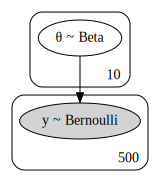

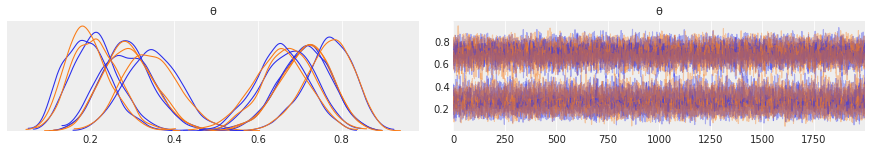

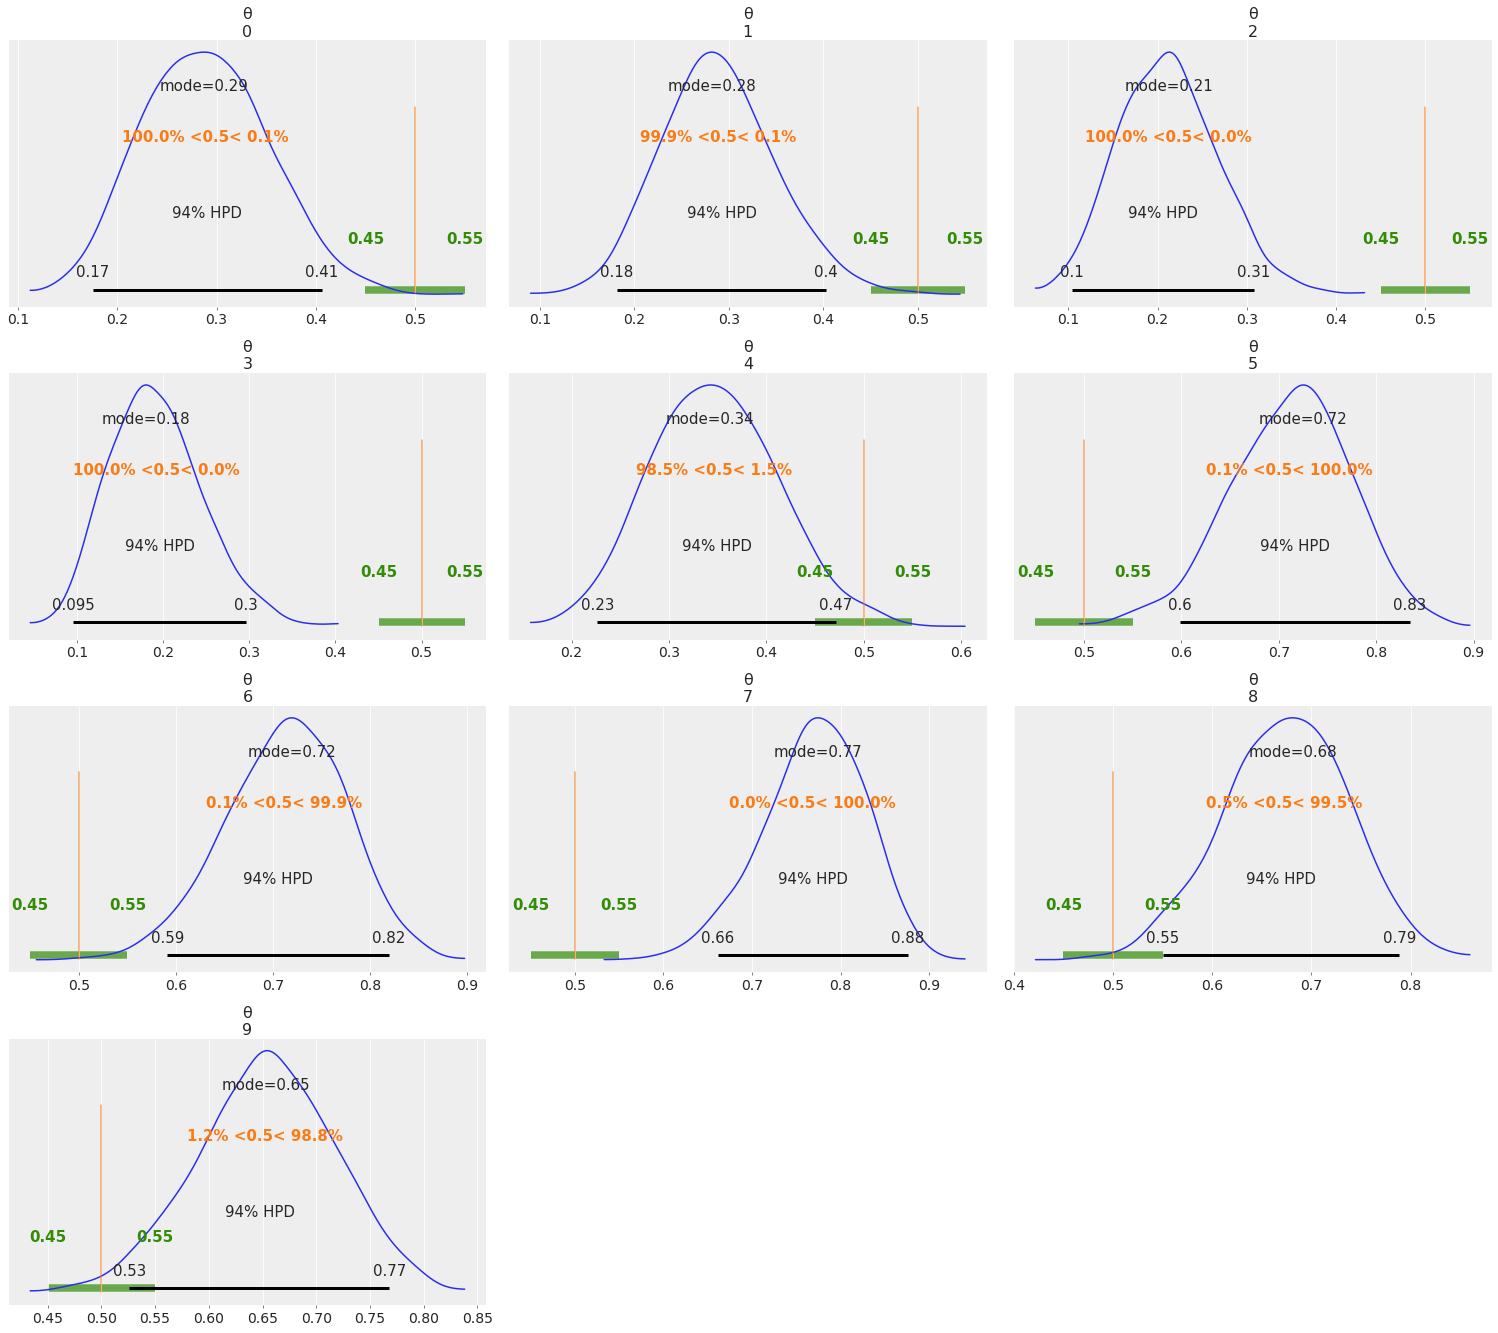

In [7]:
with pm.Model() as model:
  θ = pm.Beta('θ', alpha=1., beta=1., shape=num_coins)   # uniform prior
  
  y = pm.Bernoulli('y', p=θ[coin_id], observed=df['flip']) # likelihood p(y|θ)

  trace = pm.sample(2000, random_seed=123)
  print(az.summary(trace))
  pm.traceplot(trace)
  az.plot_posterior(trace, rope=[0.45, 0.55], ref_val=0.5, point_estimate='mode')

pm.model_to_graphviz(model)

## No Heirarchy - Mints


/usr/local/lib/python3.6/dist-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [θ]
Sampling chain 1, 0 divergences: 100%|██████████| 2500/2500 [00:02<00:00, 938.44it/s]
/usr/local/lib/python3.6/dist-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


       mean     sd  hpd_3%  hpd_97%  ...  ess_sd  ess_bulk  ess_tail  r_hat
θ[0]  0.258  0.027   0.203    0.306  ...  3373.0    3382.0    2384.0    1.0
θ[1]  0.710  0.028   0.657    0.764  ...  3390.0    3388.0    2761.0    1.0

[2 rows x 11 columns]


/usr/local/lib/python3.6/dist-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarnin

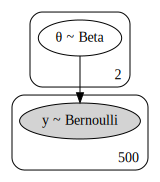

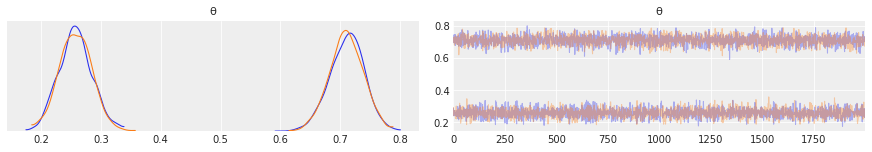

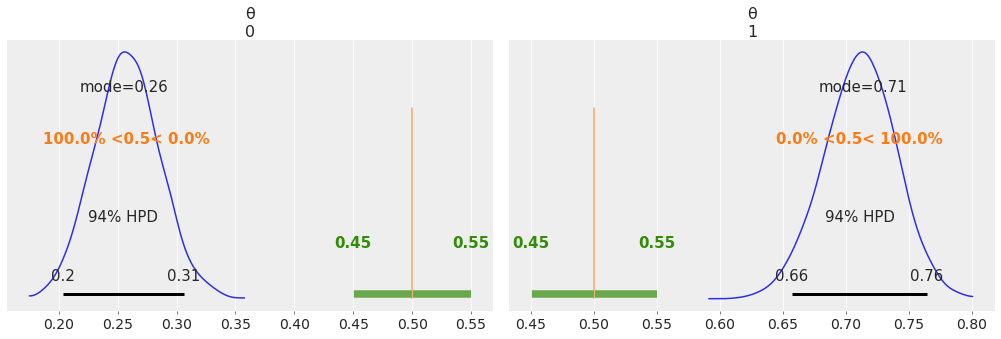

In [8]:
mint_id = df['mint_id']

with pm.Model() as model:
  θ = pm.Beta('θ', alpha=1., beta=1., shape=num_mints)   # uniform prior
  
  y = pm.Bernoulli('y', p=θ[mint_id], observed=df['flip']) # likelihood p(y|θ)

  trace = pm.sample(2000, random_seed=123)
  print(az.summary(trace))
  pm.traceplot(trace)
  az.plot_posterior(trace, rope=[0.45, 0.55], ref_val=0.5, point_estimate='mode')

pm.model_to_graphviz(model)

## Heirarchy under Mint

In [9]:
grouped = df.groupby(['mint_id', 'coin_id']).agg({'flip': [np.sum, np.size]}).reset_index()
grouped.columns = ['mint_id', 'coin_id', 'heads', 'total']

# mint id series needs to be the length of the mints
mint_id = grouped['mint_id']

/usr/local/lib/python3.6/dist-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/usr/local/lib/python3.6/dist-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/usr/local/lib/python3.6/dist-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

                         mean     sd  hpd_3%  ...  ess_bulk  ess_tail  r_hat
μ_mint[0]               0.280  0.064   0.158  ...    4839.0    2846.0    1.0
μ_mint[1]               0.690  0.063   0.577  ...    5453.0    3251.0    1.0
concentration_mint[0]  13.927  6.174   2.548  ...    4473.0    2226.0    1.0
concentration_mint[1]  14.437  6.373   3.596  ...    4677.0    2576.0    1.0
θ_coin[0]               0.280  0.057   0.170  ...    6753.0    2732.0    1.0
θ_coin[1]               0.279  0.055   0.176  ...    6775.0    2782.0    1.0
θ_coin[2]               0.216  0.052   0.120  ...    6766.0    2892.0    1.0
θ_coin[3]               0.200  0.051   0.106  ...    6756.0    2811.0    1.0
θ_coin[4]               0.327  0.060   0.214  ...    8112.0    2891.0    1.0
θ_coin[5]               0.716  0.058   0.607  ...    7977.0    3029.0    1.0
θ_coin[6]               0.714  0.057   0.613  ...    6931.0    2935.0    1.0
θ_coin[7]               0.761  0.055   0.650  ...    7394.0    2970.0    1.0

/usr/local/lib/python3.6/dist-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarnin

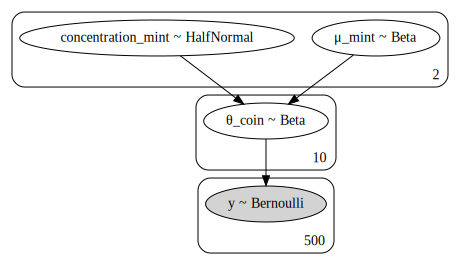

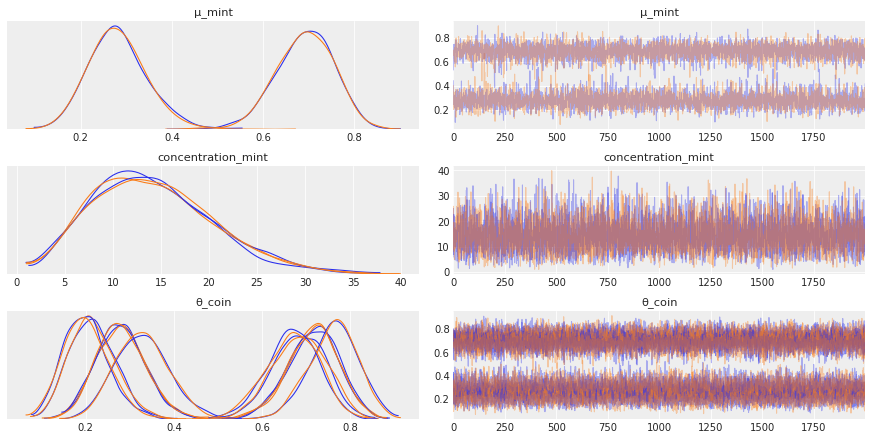

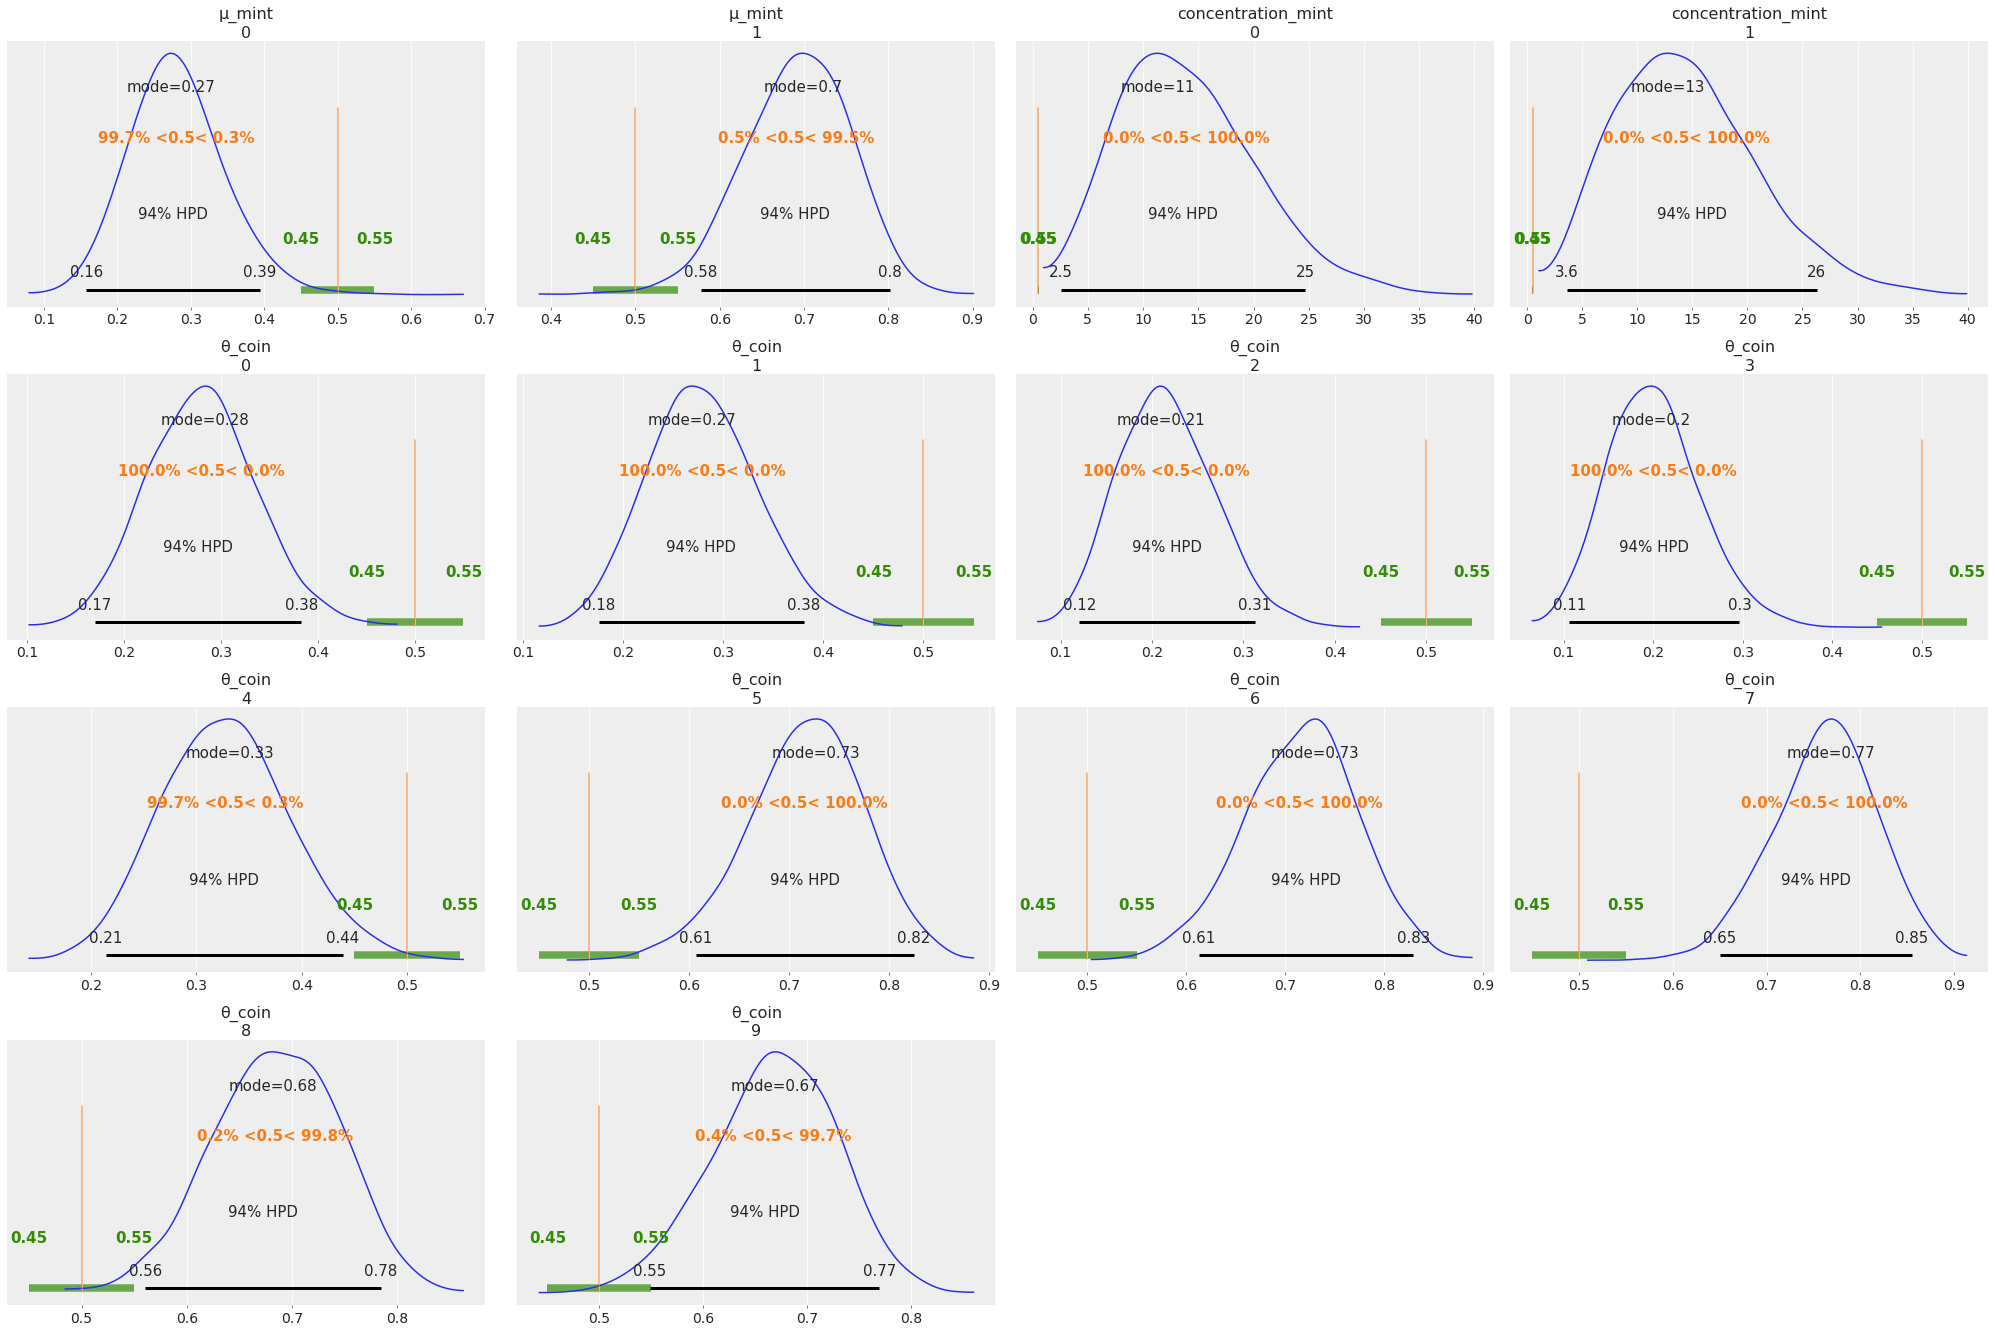

In [10]:
with pm.Model() as model_h_mint:
    μ_mint = pm.Beta('μ_mint', 1, 1, shape=num_mints)
    concentration_mint = pm.HalfNormal('concentration_mint', 10, shape=num_mints)    

    θ_coin = pm.Beta('θ_coin', alpha=μ_mint[mint_id]*concentration_mint[mint_id], beta=(1.0-μ_mint[mint_id])*concentration_mint[mint_id], shape=num_coins)
    y = pm.Bernoulli('y', p=θ_coin[coin_id], observed=df['flip']) # likelihood p(y|θ)
  
    trace = pm.sample(2000, random_seed=123)
    print(az.summary(trace))
    pm.traceplot(trace)
    az.plot_posterior(trace, rope=[0.45, 0.55], ref_val=0.5, point_estimate='mode')

pm.model_to_graphviz(model_h_mint)